In [10]:
import os
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import seaborn as sns
from glob import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")

crop_folder=r'Cropped'
grocery_path=r'Grocery_Items_4.csv'


In [4]:
groceries= [line.dropna().tolist() for idx, line in pd.read_csv(grocery_path).iterrows()]

te = TransactionEncoder()
te_ary = te.fit(groceries).transform(groceries)
groceries_df = pd.DataFrame(te_ary, columns=te.columns_)
fi = apriori(groceries_df, min_support=0.01, use_colnames=True)
association_rules(fi, metric="confidence", min_threshold=0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.117875,0.157,0.014875,0.126193,0.803777,-0.003631,0.964744
1,(rolls/buns),(whole milk),0.115875,0.157,0.015000,0.129450,0.824521,-0.003192,0.968353
2,(soda),(whole milk),0.101625,0.157,0.012625,0.124231,0.791282,-0.003330,0.962583
3,(yogurt),(whole milk),0.084750,0.157,0.012000,0.141593,0.901866,-0.001306,0.982052


<AxesSubplot:xlabel='msv', ylabel='mct'>

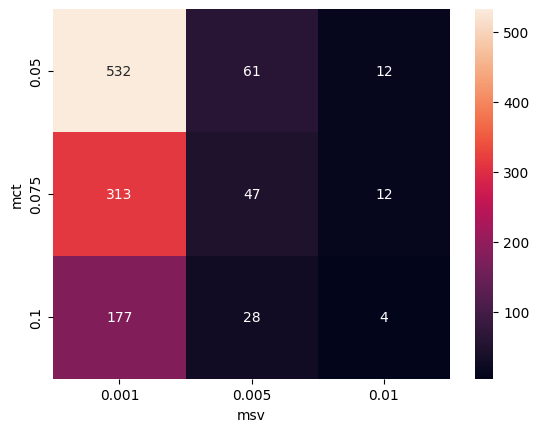

In [5]:
msv =[0.001,0.005,0.01]
mct =[0.05,0.075,0.1]

heatmap_df = pd.DataFrame(columns=['msv', 'mct', 'count'])
for i in msv:
    for j in mct:
        heatmap_df = heatmap_df.append({'msv': i, 'mct': j, 'count': len(association_rules(apriori(groceries_df, min_support=i, use_colnames=True), metric="confidence", min_threshold=j))}, ignore_index=True)
sns.heatmap(heatmap_df.pivot("mct", "msv", "count"),annot=True,fmt=".0f")

In [6]:
subset1 = groceries_df.iloc[:len(groceries_df)//2]
subset2 = groceries_df.iloc[len(groceries_df)//2:]
association_rules(apriori(subset1, min_support=0.005, use_colnames=True), metric="confidence", min_threshold=0.075)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(whole milk),0.04450,0.16300,0.00525,0.117978,0.723789,-0.002003,0.948955
1,(bottled water),(other vegetables),0.05250,0.11625,0.00650,0.123810,1.065028,0.000397,1.008628
2,(bottled water),(whole milk),0.05250,0.16300,0.00625,0.119048,0.730353,-0.002307,0.950108
3,(butter),(whole milk),0.03500,0.16300,0.00625,0.178571,1.095530,0.000545,1.018957
4,(canned beer),(rolls/buns),0.05150,0.11925,0.00650,0.126214,1.058395,0.000359,1.007969
5,(canned beer),(soda),0.05150,0.10650,0.00550,0.106796,1.002780,0.000015,1.000332
6,(canned beer),(whole milk),0.05150,0.16300,0.00675,0.131068,0.804098,-0.001644,0.963251
7,(citrus fruit),(rolls/buns),0.05200,0.11925,0.00550,0.105769,0.886954,-0.000701,0.984925
8,(citrus fruit),(whole milk),0.05200,0.16300,0.00675,0.129808,0.796366,-0.001726,0.961856
9,(frankfurter),(rolls/buns),0.04000,0.11925,0.00500,0.125000,1.048218,0.000230,1.006571


In [7]:
association_rules(apriori(subset2, min_support=0.005, use_colnames=True), metric="confidence", min_threshold=0.075)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(other vegetables),0.03975,0.11950,0.00500,0.125786,1.052604,0.000250,1.007191
1,(bottled beer),(whole milk),0.03975,0.15100,0.00650,0.163522,1.082927,0.000498,1.014970
2,(bottled water),(other vegetables),0.05775,0.11950,0.00575,0.099567,0.833197,-0.001151,0.977863
3,(bottled water),(rolls/buns),0.05775,0.11250,0.00550,0.095238,0.846561,-0.000997,0.980921
4,(bottled water),(whole milk),0.05775,0.15100,0.00725,0.125541,0.831398,-0.001470,0.970886
5,(brown bread),(soda),0.04325,0.09675,0.00500,0.115607,1.194904,0.000816,1.021322
6,(brown bread),(whole milk),0.04325,0.15100,0.00550,0.127168,0.842170,-0.001031,0.972695
7,(canned beer),(whole milk),0.04975,0.15100,0.00550,0.110553,0.732138,-0.002012,0.954525
8,(citrus fruit),(other vegetables),0.05350,0.11950,0.00600,0.112150,0.938490,-0.000393,0.991721
9,(citrus fruit),(whole milk),0.05350,0.15100,0.00550,0.102804,0.680819,-0.002578,0.946281


In [8]:
pd.merge(association_rules(apriori(subset1, min_support=0.005, use_colnames=True), metric="confidence", min_threshold=0.075),association_rules(apriori(subset2, min_support=0.005, use_colnames=True), metric="confidence", min_threshold=0.075) ,on=['antecedents', 'consequents'])


,antecedents,consequents,antecedent support_x,consequent support_x,support_x,confidence_x,lift_x,leverage_x,conviction_x,antecedent support_y,consequent support_y,support_y,confidence_y,lift_y,leverage_y,conviction_y
0,(bottled beer),(whole milk),0.04450,0.16300,0.00525,0.117978,0.723789,-0.002003,0.948955,0.03975,0.15100,0.00650,0.163522,1.082927,0.000498,1.014970
1,(bottled water),(other vegetables),0.05250,0.11625,0.00650,0.123810,1.065028,0.000397,1.008628,0.05775,0.11950,0.00575,0.099567,0.833197,-0.001151,0.977863
2,(bottled water),(whole milk),0.05250,0.16300,0.00625,0.119048,0.730353,-0.002307,0.950108,0.05775,0.15100,0.00725,0.125541,0.831398,-0.001470,0.970886
3,(canned beer),(whole milk),0.05150,0.16300,0.00675,0.131068,0.804098,-0.001644,0.963251,0.04975,0.15100,0.00550,0.110553,0.732138,-0.002012,0.954525
4,(citrus fruit),(whole milk),0.05200,0.16300,0.00675,0.129808,0.796366,-0.001726,0.961856,0.05350,0.15100,0.00550,0.102804,0.680819,-0.002578,0.946281
5,(frankfurter),(whole milk),0.04000,0.16300,0.00550,0.137500,0.843558,-0.001020,0.970435,0.03325,0.15100,0.00525,0.157895,1.045661,0.000229,1.008188
6,(rolls/buns),(other vegetables),0.11925,0.11625,0.01125,0.094340,0.811524,-0.002613,0.975807,0.11250,0.11950,0.00950,0.084444,0.706648,-0.003944,0.961711
7,(other vegetables),(rolls/buns),0.11625,0.11925,0.01125,0.096774,0.811524,-0.002613,0.975116,0.11950,0.11250,0.00950,0.079498,0.706648,-0.003944,0.964148
8,(shopping bags),(other vegetables),0.05350,0.11625,0.00525,0.098131,0.844136,-0.000969,0.979909,0.04700,0.11950,0.00675,0.143617,1.201816,0.001133,1.028161
9,(soda),(other vegetables),0.10650,0.11625,0.01050,0.098592,0.848099,-0.001881,0.980410,0.09675,0.11950,0.00875,0.090439,0.756814,-0.002812,0.968050


Train on 660 samples, validate on 165 samples
Epoch 1/10
660/660 [==============================] - 4s 6ms/sample - loss: 2.5374 - accuracy: 0.2667 - val_loss: 1.3574 - val_accuracy: 0.4182
Epoch 2/10
660/660 [==============================] - 3s 4ms/sample - loss: 1.3214 - accuracy: 0.4273 - val_loss: 1.3916 - val_accuracy: 0.3152
Epoch 3/10
660/660 [==============================] - 3s 4ms/sample - loss: 1.0789 - accuracy: 0.5288 - val_loss: 1.2455 - val_accuracy: 0.5030
Epoch 4/10
660/660 [==============================] - 3s 4ms/sample - loss: 0.9158 - accuracy: 0.6515 - val_loss: 1.1871 - val_accuracy: 0.5455
Epoch 5/10
660/660 [==============================] - 3s 4ms/sample - loss: 0.8499 - accuracy: 0.6530 - val_loss: 1.2755 - val_accuracy: 0.5091
Epoch 6/10
660/660 [==============================] - 3s 4ms/sample - loss: 0.7034 - accuracy: 0.7606 - val_loss: 1.1900 - val_accuracy: 0.5455
Epoch 7/10
660/660 [==============================] - 3s 4ms/sample - loss: 0.6197 - accur

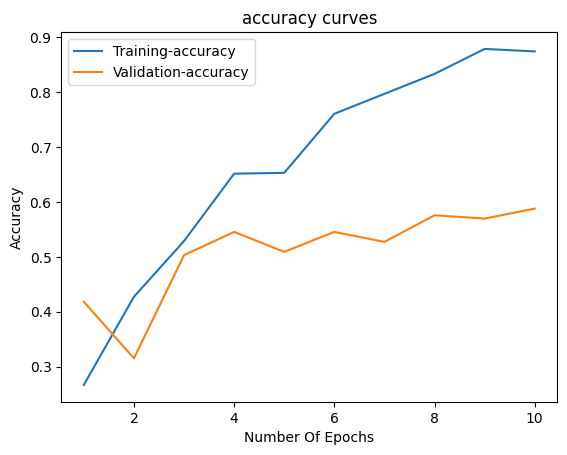

In [11]:
dir1 = 'Cropped/n02088094-Afghan_hound/'
dir2 = 'Cropped/n02093428-American_Staffordshire_terrier/'
dir3 = 'Cropped/n02110627-affenpinscher/'
dir4 = 'Cropped/n02116738-African_hunting_dog/'


def plt_curve(history):
    tacc = history.history['accuracy']
    vacc = history.history['val_accuracy']
    epochs = range(1, len(tacc) + 1)
    plt.plot(epochs, tacc , label='Training-accuracy')
    plt.plot(epochs, vacc, label='Validation-accuracy')
    plt.title('accuracy curves')
    plt.xlabel('Number Of Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
def imagebreed(directory):
    imgs = []
    breed = []
    for name in os.listdir(directory):
        if name.endswith(".jpg") or name.endswith(".png"):
            img = load_img(os.path.join(directory, name), target_size=(128,128))
            img_array = img_to_array(img)
            imgs.append(img_array)
            if directory == dir1:
                breed.append(0)
            elif directory == dir2:
                breed.append(1)
            elif directory == dir3:
                breed.append(2)
            elif directory == dir4:
                breed.append(3)
    return imgs, breed

class1_images, class1_labels = imagebreed(dir1)
class2_images, class2_labels = imagebreed(dir2)
class3_images, class3_labels = imagebreed(dir3)
class4_images, class4_labels = imagebreed(dir4)

imgs = np.concatenate([class1_images, class2_images, class3_images, class4_images], axis=0)
breed = np.concatenate([class1_labels, class2_labels, class3_labels, class4_labels], axis=0)

breed = to_categorical(breed)

X_train, X_val, y_train, y_val = train_test_split(imgs, breed, test_size=0.2, random_state=42)

X_train = X_train / 255.0
X_val = X_val / 255.0

#requested model

model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
plt_curve(history)

### Banner ID : 916472053

Train on 660 samples, validate on 165 samples
Epoch 1/10
660/660 [==============================] - 5s 7ms/sample - loss: 1.3966 - accuracy: 0.3227 - val_loss: 1.3846 - val_accuracy: 0.3333
Epoch 2/10
660/660 [==============================] - 4s 5ms/sample - loss: 1.3795 - accuracy: 0.3500 - val_loss: 1.3711 - val_accuracy: 0.3333
Epoch 3/10
660/660 [==============================] - 4s 5ms/sample - loss: 1.3288 - accuracy: 0.2909 - val_loss: 1.3093 - val_accuracy: 0.3333
Epoch 4/10
660/660 [==============================] - 4s 5ms/sample - loss: 1.2709 - accuracy: 0.3500 - val_loss: 1.2784 - val_accuracy: 0.3333
Epoch 5/10
660/660 [==============================] - 4s 6ms/sample - loss: 1.2594 - accuracy: 0.3515 - val_loss: 1.2712 - val_accuracy: 0.3333
Epoch 6/10
660/660 [==============================] - 4s 6ms/sample - loss: 1.2219 - accuracy: 0.3515 - val_loss: 1.2524 - val_accuracy: 0.3333
Epoch 7/10
660/660 [==============================] - 4s 6ms/sample - loss: 1.1958 - accur

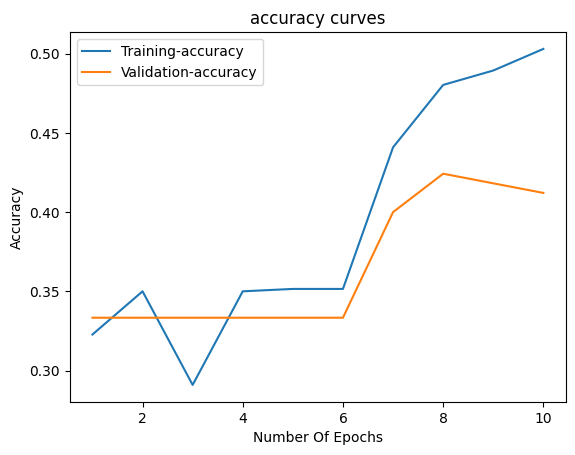

In [12]:
model = Sequential([
    Conv2D(8, (5, 5), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
plt_curve(history)

Train on 660 samples, validate on 165 samples
Epoch 1/10
660/660 [==============================] - 6s 10ms/sample - loss: 1.4071 - accuracy: 0.3136 - val_loss: 1.3405 - val_accuracy: 0.2727
Epoch 2/10
660/660 [==============================] - 6s 9ms/sample - loss: 1.2297 - accuracy: 0.4591 - val_loss: 1.1904 - val_accuracy: 0.4848
Epoch 3/10
660/660 [==============================] - 6s 9ms/sample - loss: 1.0289 - accuracy: 0.6197 - val_loss: 1.2009 - val_accuracy: 0.5333
Epoch 4/10
660/660 [==============================] - 5s 8ms/sample - loss: 0.8410 - accuracy: 0.6636 - val_loss: 1.0787 - val_accuracy: 0.5818
Epoch 5/10
660/660 [==============================] - 6s 9ms/sample - loss: 0.6607 - accuracy: 0.7470 - val_loss: 1.2482 - val_accuracy: 0.5212
Epoch 6/10
660/660 [==============================] - 6s 8ms/sample - loss: 0.5413 - accuracy: 0.7848 - val_loss: 1.0105 - val_accuracy: 0.6182
Epoch 7/10
660/660 [==============================] - 6s 9ms/sample - loss: 0.3439 - accu

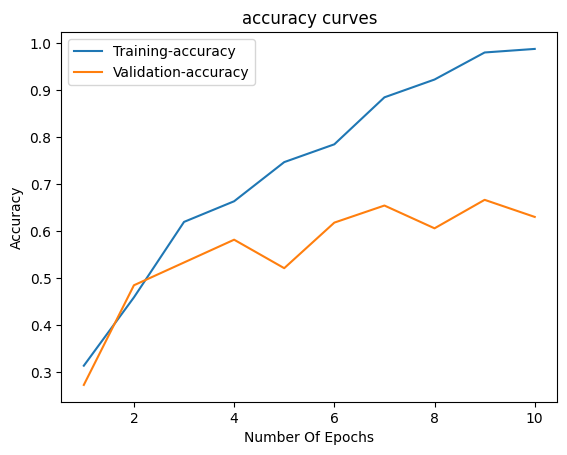

In [13]:
model = Sequential([
    Conv2D(8, (7, 7), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
plt_curve(history)